## Analysis of games played by different Agents

1. Baseline model evaluation
<br>

2. Playouts
<br>
- MCTS vs RANDOM
- MCTS vs MCTS
- MCTS vs MCTS with memory
- MCTS with memory vs PPO
- MCTS with memory vs PPO+MCTS
<br>
3. Results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1. Baseline Model evaluation

![baseline](https://github.com/KaufmannLukas/ds-ultimate-tic-tac-toe/raw/main/images/slide_12_baseline.png)

To get an overview about some game statistics, we simulated 1 million randomly played games with our baseline model.
The results show, that the starting player white (X) has about 5% higher chance of winning than black (O). The chances for a draw are about 22.5%.
The average (randomly played) game takes about 35-70 moves, drawed games tend to be a bit longer.

The rest of the model analysis and evaluation process shown below, consists of different playouts of variations of our agents in order to test their performance.

- 'random' represents our baseline model, which is playing random moves.
- 'MCTS' stands for Monte Carlo Tree Search, which is a Search Algorithm and our first model.
- 'Memory' means the ability for MCTS to load previous iterations and actually learn from them.
-  'PPO' stands for Proximal Policy Optimization, which consists of two neural networks and represents or second model category.
- 'PPO plus' means that the PPO agent is connected to the MCTS agents, in order to prevent playing invalid moves and to boost its performance.

### 2. Playouts

In [2]:
# MCTS with differerent iterations
mcts_10 = pd.read_csv("data/eda/random_vs_mcts_10.csv")
mcts_20 = pd.read_csv("data/eda/random_vs_mcts_20.csv")
mcts_50 = pd.read_csv("data/eda/random_vs_mcts_50.csv")
mcts_100 = pd.read_csv("data/eda/random_vs_mcts_100.csv")
mcts_500 = pd.read_csv("data/eda/random_vs_mcts_500.csv")
mcts_1000 = pd.read_csv("data/eda/random_vs_mcts_1000.csv")
mcts_2000 = pd.read_csv("data/eda/random_vs_mcts_2000.csv")

#MCTS with memory and different iterations 
mcts_1000_memory = pd.read_csv("data/eda/random_vs_mcts_1000_memory_1.csv")
mcts_mcts_01_1000 = pd.read_csv("data/eda/mcts_no_mem_vs_mcts_agent_01_1000.csv")
mcts_mcts_01_1000_2_1000_games = pd.read_csv("data/eda/mcts_no_mem_vs_mcts_agent_01_2_1000.csv")
mcts_mcts_02_1000 = pd.read_csv("data/eda/mcts_no_mem_vs_mcts_agent_02_1_1000.csv")
mcts_mcts_02_1000_2 = pd.read_csv("data/eda/mcts_no_mem_vs_mcts_agent_02_2_1000.csv")
mcts_mcts_02_1000_3 = pd.read_csv("data/eda/mcts_no_mem_vs_mcts_agent_02_3_1000.csv")
mcts_1000_mem_vs_mcts_1000 = pd.read_csv("data/eda/mcts_1000_memory_vs_mcts_1000.csv")
mcts_2000_vs_mcts_1000 = pd.read_csv("data/eda/mcts_no_mem_2000_vs_mcts_agent_no_mem_1000_2000.csv")

#PPO
ppo_random_01_1000000 = pd.read_csv("data/eda/random_vs_ppo_v1_1000000.csv")
ppo_random_02_100000 = pd.read_csv("data/eda/random_vs_ppo_v2_100000.csv")
#ppo_random_02_1000000 = pd.read_csv("data/eda/random_vs_ppo_v2_1000000.csv")
ppo_random_03_75000000 = pd.read_csv("data/eda/random_vs_ppo_v3_75_000_000_fin.csv")
ppo_random_04 = pd.read_csv("data/eda/random_vs_ppo_v4.csv")
ppo_random_04_2 = pd.read_csv("data/eda/random_vs_ppo_v4_2.csv")

#PPO with mcts
ppo_plus_vs_random = pd.read_csv("data/eda/ppo_plus_vs_random_100_games.csv")
ppo_plus_vs_mcts_with_mem = pd.read_csv("data/eda/ppo_plus_vs_mcts_1000_with_memory.csv")
ppo_plus_vs_mcts_1000 = pd.read_csv("data/eda/ppo_plus_vs_mcts_1000.csv")


In [3]:
#rename column name
mcts_10.rename(columns={'mcts_color': 'color'}, inplace=True)
mcts_100.rename(columns={'mcts_color': 'color'}, inplace=True)
mcts_1000.rename(columns={'mcts_color': 'color'}, inplace=True)
mcts_2000.rename(columns={'mcts_color': 'color'}, inplace=True)
mcts_1000_memory.rename(columns={'mcts_color': 'color'}, inplace=True)
ppo_random_01_1000000.rename(columns={'ppo_color': 'color'}, inplace=True)
ppo_plus_vs_random.rename(columns={'ppo_color': 'color'}, inplace=True)
ppo_plus_vs_mcts_1000.rename(columns={'ppo_color': 'color'}, inplace=True)
ppo_plus_vs_mcts_with_mem.rename(columns={'ppo_color': 'color'}, inplace=True)
mcts_2000_vs_mcts_1000.rename(columns={'mcts_color': 'color'}, inplace=True)

# Create a new column for general overview
mcts_10["RL Methods"] = "MCTS (10)"
mcts_100["RL Methods"] = "MCTS (100)"
mcts_1000["RL Methods"] = "MCTS (1000)"
mcts_2000["RL Methods"] = "MCTS (2000)"
mcts_2000_vs_mcts_1000["RL Methods"] = "MCTS (2000)"
mcts_1000_memory["RL Methods"] = "MCTS (Memory)"
ppo_random_01_1000000["RL Methods"] = "PPO"
ppo_plus_vs_random["RL Methods"] = "PPO+MCTS"
ppo_plus_vs_mcts_1000["RL Methods"] = "PPO+MCTS"
ppo_plus_vs_mcts_with_mem["RL Methods"] = "PPO+MCTS"


In [4]:
mcts_10_wins = mcts_10[mcts_10["winner"] == mcts_10["color"]].value_counts()
mcts_10_draws = mcts_10["winner"].isna().sum()
mcts_10_losses = mcts_10[mcts_10["winner"] != mcts_10["color"]].value_counts()

print(f"The MCTS_10 has won {mcts_10_wins.shape[0]} out of {mcts_10.shape[0]} games against Baseline Model.")
print(f"The MCTS_10 has tied {mcts_10_draws} out of {mcts_10.shape[0]} games against Baseline Model.")
print(f"The MCTS_10 has lost {mcts_10_losses.shape[0]} out of {mcts_10.shape[0]} games against Baseline Model.")

The MCTS_10 has won 49 out of 100 games against Baseline Model.
The MCTS_10 has tied 25 out of 100 games against Baseline Model.
The MCTS_10 has lost 26 out of 100 games against Baseline Model.


In [5]:
# Agent 01
# iterations: 1000
# games: 100
# old value structure (-1, 0, 1)
# memory created, updated 0 times
# memory size: 1.12 GB

mcts_1000_memory_wins = mcts_1000_memory[mcts_1000_memory["winner"] == mcts_1000_memory["color"]].value_counts()
mcts_1000_memory_draws = mcts_1000_memory["winner"].isna().sum()
mcts_1000_memory_losses = mcts_1000_memory[mcts_1000_memory["winner"] != mcts_1000_memory["color"]].value_counts()

print(f"The MCTS_1000_memory has won {mcts_1000_memory_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The MCTS_1000_memory has tied {mcts_1000_memory_draws} out of 100 games against Baseline Model.")
print(f"The MCTS_1000_memory has lost {mcts_1000_memory_losses.shape[0]} out of 100 games against Baseline Model.")

The MCTS_1000_memory has won 100 out of 100 games against Baseline Model.
The MCTS_1000_memory has tied 0 out of 100 games against Baseline Model.
The MCTS_1000_memory has lost 0 out of 100 games against Baseline Model.


In [6]:


mcts_mcts_02_1000_3_wins = mcts_mcts_02_1000_3[mcts_mcts_02_1000_3["winner"] == mcts_mcts_02_1000_3["mcts_color"]].value_counts()
mcts_mcts_02_1000_3_draws = mcts_mcts_02_1000_3["winner"].isna().sum()
mcts_mcts_02_1000_3_losses = mcts_mcts_02_1000_3[mcts_mcts_02_1000_3["winner"] != mcts_mcts_02_1000_3["mcts_color"]].value_counts()

print(f"The MCTS_mcts_02_1000_3 has won {mcts_mcts_02_1000_3_wins.shape[0]} out of 100 games against MCTS (no memory).")
print(f"The MCTS_mcts_02_1000_3 has tied {mcts_mcts_02_1000_3_draws} out of 100 games against MCTS (no memory).")
print(f"The MCTS_mcts_02_1000_3 has lost {mcts_mcts_02_1000_3_losses.shape[0]} out of 100 games against MCTS (no memory).")

The MCTS_mcts_02_1000_3 has won 51 out of 100 games against MCTS (no memory).
The MCTS_mcts_02_1000_3 has tied 23 out of 100 games against MCTS (no memory).
The MCTS_mcts_02_1000_3 has lost 26 out of 100 games against MCTS (no memory).


In [7]:

ppo_01_wins = ppo_random_01_1000000[ppo_random_01_1000000["winner"] == ppo_random_01_1000000["color"]].value_counts()
ppo_01_draws = ppo_random_01_1000000["winner"].isna().sum()
ppo_01_losses = ppo_random_01_1000000[ppo_random_01_1000000["winner"] != ppo_random_01_1000000["color"]].value_counts()

print(f"The ppo_01 has won {ppo_01_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The ppo_01 has tied {ppo_01_draws} out of 100 games against Baseline Model.")
print(f"The ppo_01 has lost {ppo_01_losses.shape[0]} out of 100 games against Baseline Model.")

The ppo_01 has won 61 out of 100 games against Baseline Model.
The ppo_01 has tied 8 out of 100 games against Baseline Model.
The ppo_01 has lost 31 out of 100 games against Baseline Model.


In [8]:
# Combine dataframes
mcts = [mcts_10,mcts_100, mcts_1000, mcts_2000]
combined_mcts = pd.concat(mcts)
combined_mcts.drop("Unnamed: 0", axis=1, inplace=True)

models = [mcts_10,mcts_100,mcts_1000,mcts_2000,mcts_1000_memory,ppo_random_01_1000000,ppo_plus_vs_random]
rl_basemodel = pd.concat(models)
rl_basemodel.drop("Unnamed: 0", axis=1, inplace=True)

models1 = [mcts_2000_vs_mcts_1000,mcts_1000_mem_vs_mcts_1000,ppo_plus_vs_mcts_1000]
rl_mcts_1000 = pd.concat(models1)
rl_mcts_1000.drop("Unnamed: 0", axis=1, inplace=True)

models2 = [ppo_plus_vs_mcts_with_mem,]
rl_mcts_with_mem = pd.concat(models2)
rl_mcts_with_mem.drop("Unnamed: 0", axis=1, inplace=True)

/Users/lukaskaufmann/miniforge3/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lukaskaufmann/miniforge3/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lukaskaufmann/miniforge3/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lukaskaufmann/miniforge3/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

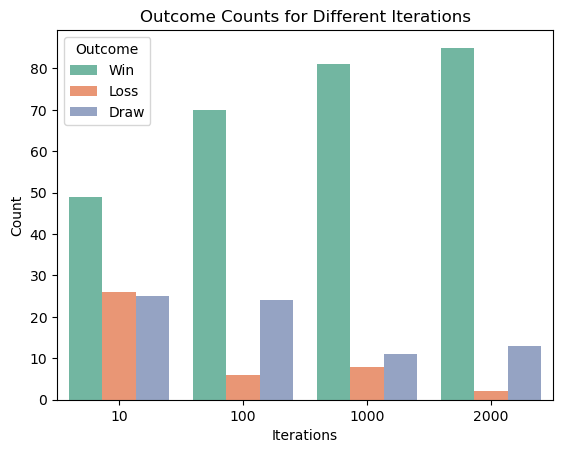

In [9]:
# MCTS vs Random with different number of iterations.

filtered_data = combined_mcts[combined_mcts["winner"] == combined_mcts["color"]]

win_data = combined_mcts[(combined_mcts["color"] == combined_mcts["winner"]) & ~combined_mcts["winner"].isna()]
loss_data = combined_mcts[(combined_mcts["color"] != combined_mcts["winner"]) & ~combined_mcts["winner"].isna()]
draw_data = combined_mcts[combined_mcts["winner"].isna()]

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({
    'num_iter': combined_mcts['num_iter'].unique(),
    'Win': win_data.groupby('num_iter').size(),
    'Loss': loss_data.groupby('num_iter').size(),
    'Draw': draw_data.groupby('num_iter').size().fillna(0)
})

# Melt the DataFrame for Seaborn
plot_data_melted = pd.melt(plot_data, id_vars='num_iter', var_name='Outcome', value_name='Count')

# Create a bar plot
sns.barplot(data=plot_data_melted, x='num_iter', y='Count', hue='Outcome',palette='Set2')

# Set plot labels and title
plt.xlabel('Iterations')
plt.ylabel('Count')
plt.title('Outcome Counts for Different Iterations')

# Show the plot
plt.show()

/Users/lukaskaufmann/miniforge3/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lukaskaufmann/miniforge3/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lukaskaufmann/miniforge3/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lukaskaufmann/miniforge3/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

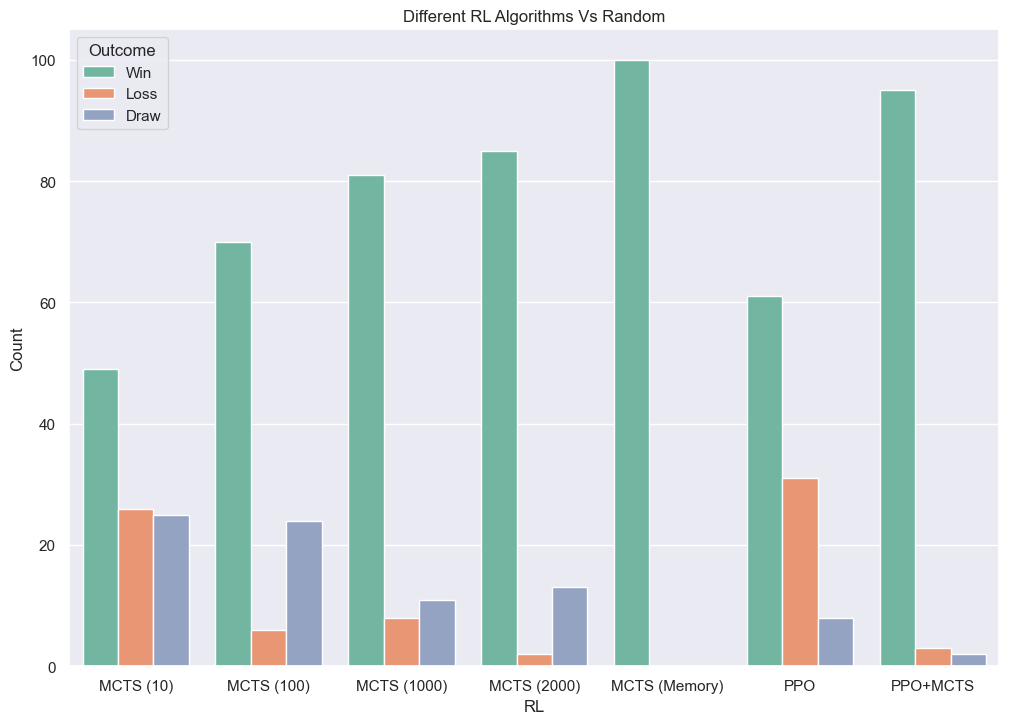

In [13]:
#Stage-01 Against Random

#Create Win,Loss,Draw dataFrame
win_data_RL = rl_basemodel[(rl_basemodel["color"] == rl_basemodel["winner"]) & ~rl_basemodel["winner"].isna()]
loss_data_RL = rl_basemodel[(rl_basemodel["color"] != rl_basemodel["winner"]) & ~rl_basemodel["winner"].isna()]
draw_data_RL = rl_basemodel[rl_basemodel["winner"].isna()]
# Create a new DataFrame for plotting
plot_data = pd.DataFrame({
    'RL Methods': rl_basemodel['RL Methods'].unique(),
    'Win': win_data_RL.groupby('RL Methods').size(),
    'Loss': loss_data_RL.groupby('RL Methods').size(),
    'Draw': draw_data_RL.groupby('RL Methods').size().fillna(0)
})

# Melt the DataFrame for Seaborn
plot_data_melted = pd.melt(plot_data, id_vars='RL Methods', var_name='Outcome', value_name='Count')

# Create a bar plot
sns.barplot(data=plot_data_melted, x='RL Methods', y='Count', hue='Outcome',palette='Set2')

# Set plot labels and title
sns.set(rc={'figure.figsize':(12,8.27)})
plt.xlabel('RL')
plt.ylabel('Count')
plt.title('Different RL Algorithms Vs Random')

# Show the plot
plt.show()

/Users/lukaskaufmann/miniforge3/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lukaskaufmann/miniforge3/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lukaskaufmann/miniforge3/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lukaskaufmann/miniforge3/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

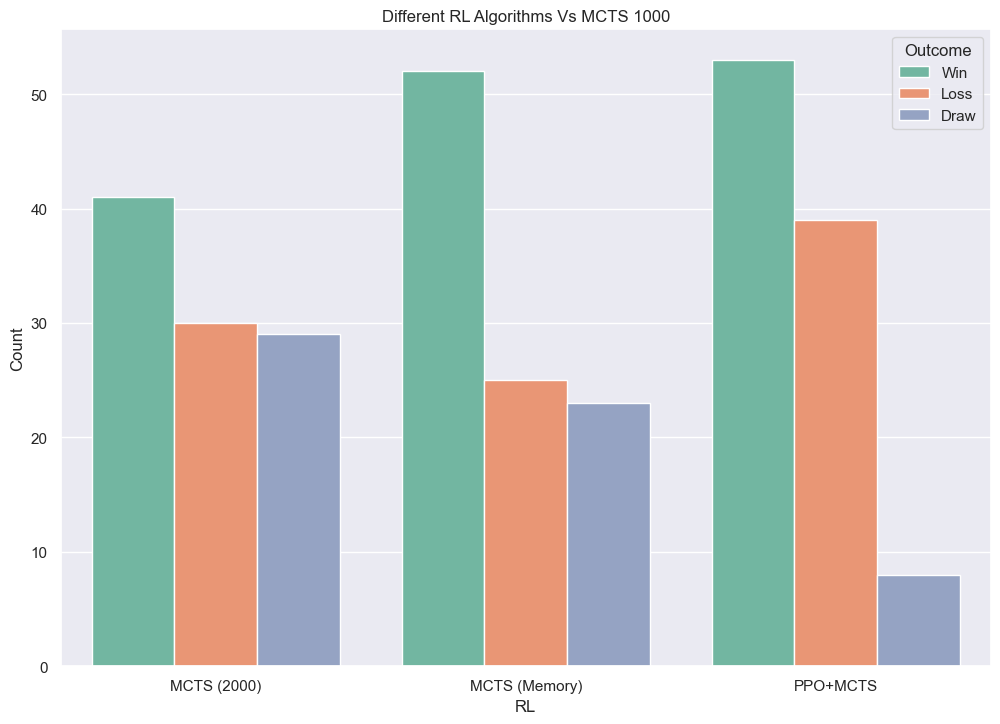

In [11]:
#Stage-02 Against MCTS 1000

#Create Win,Loss,Draw dataFrame
win_data_RL1 = rl_mcts_1000[(rl_mcts_1000["color"] == rl_mcts_1000["winner"]) & ~rl_mcts_1000["winner"].isna()]
loss_data_RL1 = rl_mcts_1000[(rl_mcts_1000["color"] != rl_mcts_1000["winner"]) & ~rl_mcts_1000["winner"].isna()]
draw_data_RL1 = rl_mcts_1000[rl_mcts_1000["winner"].isna()]
# Create a new DataFrame for plotting
plot_data = pd.DataFrame({
    'RL Methods': rl_mcts_1000['RL Methods'].unique(),
    'Win': win_data_RL1.groupby('RL Methods').size(),
    'Loss':loss_data_RL1.groupby('RL Methods').size(),
    'Draw': draw_data_RL1.groupby('RL Methods').size().fillna(0)
})

# Melt the DataFrame for Seaborn
plot_data_melted = pd.melt(plot_data, id_vars='RL Methods', var_name='Outcome', value_name='Count')

# Create a bar plot
sns.barplot(data=plot_data_melted, x='RL Methods', y='Count', hue='Outcome',palette='Set2')

# Set plot labels and title

plt.xlabel('RL')
plt.ylabel('Count')
plt.title('Different RL Algorithms Vs MCTS 1000')

# Show the plot
plt.show()

/Users/lukaskaufmann/miniforge3/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lukaskaufmann/miniforge3/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lukaskaufmann/miniforge3/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lukaskaufmann/miniforge3/envs/ds-uttt/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

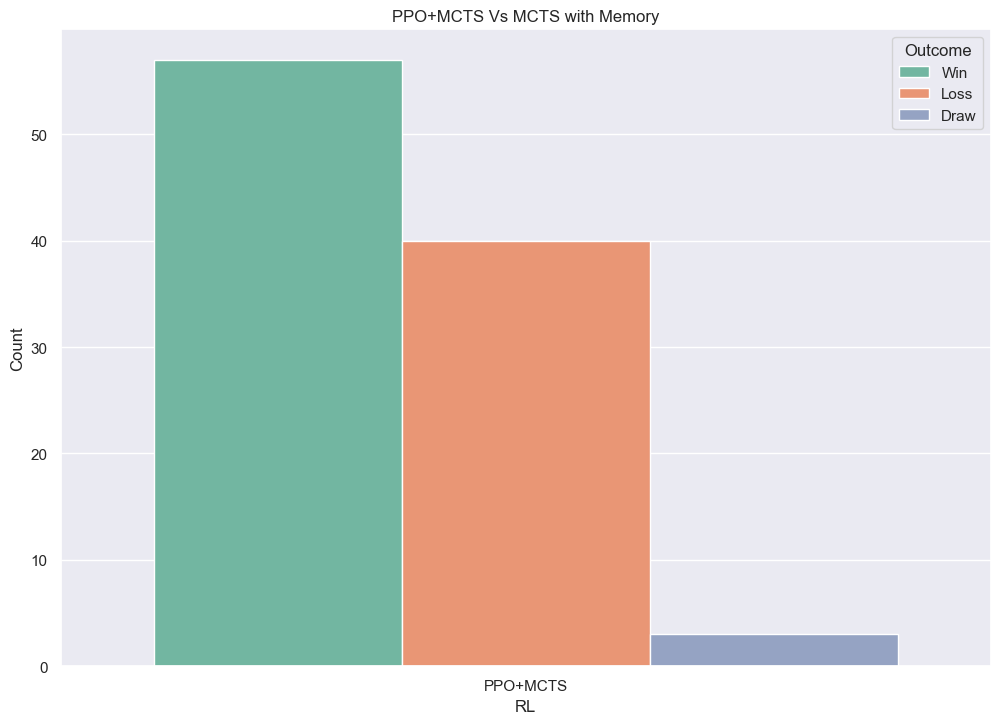

In [12]:
#Stage-03 Against MCTS with Memory

#Create Win,Loss,Draw dataFrame
win_data_RL2 = rl_mcts_with_mem[(rl_mcts_with_mem["color"] == rl_mcts_with_mem["winner"]) & ~rl_mcts_with_mem["winner"].isna()]
loss_data_RL2 = rl_mcts_with_mem[(rl_mcts_with_mem["color"] != rl_mcts_with_mem["winner"]) & ~rl_mcts_with_mem["winner"].isna()]
draw_data_RL2 = rl_mcts_with_mem[rl_mcts_with_mem["winner"].isna()]
# Create a new DataFrame for plotting
plot_data = pd.DataFrame({
    'RL Methods': rl_mcts_with_mem['RL Methods'].unique(),
    'Win': win_data_RL2.groupby('RL Methods').size(),
    'Loss':loss_data_RL2.groupby('RL Methods').size(),
    'Draw': draw_data_RL2.groupby('RL Methods').size().fillna(0)
})

# Melt the DataFrame for Seaborn
plot_data_melted = pd.melt(plot_data, id_vars='RL Methods', var_name='Outcome', value_name='Count')

# Create a bar plot
sns.barplot(data=plot_data_melted, x='RL Methods', y='Count', hue='Outcome',palette='Set2')

# Set plot labels and title

plt.xlabel('RL')
plt.ylabel('Count')
plt.title('PPO+MCTS Vs MCTS with Memory')

# Show the plot
plt.show()

### 3. Results

In summary, our 'PPO plus' (or 'PPO+MCTS') agent was winning almost 60% of the games against the second strongest model - 'MCTS+Memory'.
We expected that the PPO agent would outperform the MCTS agent even further, but during selfplay (when PPO was training against itself) we had some stagnating behaviour which lead to learning plateaus.
As future steps we want to improve our PPO agent even more. So far, he was able to beat humans several times, reach draws a lot, but for an experienced Ultimate Tic-Tac-Toe player, who is playing good moves constantly, it is still possible to win against our model.